### IMPORT

In [1]:
from netCDF4 import Dataset as ncfile
import numpy as np
from netCDF4 import num2date
import matplotlib.dates as dates
import datetime
import matplotlib.pyplot as plt
import cartopy
import datetime
from matplotlib import dates
#from adjustText import adjust_text

### READ DATA

In [2]:
ppidir = '/lustre/storeB/users/justinec/master_internship/data/ERA5_MOSAiC/'
data_link  = ppidir + 'concatenated_ERA5_MOSAiC.nc'

dataset = ncfile(data_link,'r')    #dataset of radiosoundings of MOSAiC and ERA5

In [3]:
pres = dataset.variables['pres'][:]
mosaic_time = dataset.variables['time_mosaic'][:]
mosaic_lat = dataset.variables['lat_mosaic'][:]
mosaic_lon = dataset.variables['lon_mosaic'][:]

### CONVERT TIME

In [4]:
"""Function that convert times of a dataset depemding on its unit and calendar 
type to a datetime then to Matplotlib dates.
---exemple---
ERA5 :  'hours since 1900-01-01 00:00:00.0' become datetime of type 2019-10-01 00:00:00 then 18170
MOSAiC : 'seconds since 2019-10-31T22:55:09.757Z' become datetime of type 2019-10-31 22:55:09.757000 then 18200.954974039352
"""
def convert_time(dataset) :
    dataset_time = dataset.variables['time_mosaic']
    t_unit = dataset_time.units
    t_cal = dataset_time.calendar
    dataset_nctime=[]; 
    dataset_nctime.append(num2date(dataset_time,units = t_unit,calendar = t_cal, only_use_python_datetimes=True, only_use_cftime_datetimes=False)) #datetime of type 2019-10-01 00:00:00
    #dates.date2num --> convert datetime objects to Matplotlib dates (better for compare ERA5 and MOSAiC times and for figures)
    #np.squeeze --> pass Matplotlib dates in column instead of in line
    dataset_nctimenum = np.squeeze(dates.date2num(dataset_nctime))
    return dataset_nctime,dataset_nctimenum,t_unit

In [5]:
mosaic_nctime, mosaic_nctimenum, t_unit = convert_time(dataset)

### LATITUDES, LONGITUDES AND DATES FOR EACH MONTH

In [6]:
# Keep only the first lat, lon and time of each radiosounding
times=[] ; lat=[] ; lon=[]
for i in range(0,len(mosaic_nctime[0])) :
    times.append(mosaic_nctime[0][i][0])
    lat.append(mosaic_lat[i][0])
    lon.append(mosaic_lon[i][0])

In [7]:
# Indexes [i,j] of dates in each month : dates of january are between [0,124], dates of february between [124,241] etc.
list_indx_i = [0,124,241,359,480,596,710,825,945,1036,1159,1280]
list_indx_j = [124,241,359,480,596,710,825,945,1036,1159,1280,1400]

In [8]:
# Dictiornary with the lists of lat, lon and times in each month
lat_list={} ; lon_list={} ; time_list={}
for m in range(0,12) :
    month = str(m)
    lat_list[month] = lat[list_indx_i[m]:list_indx_j[m]]
    lon_list[month] = lon[list_indx_i[m]:list_indx_j[m]]
    time_list[month] = times[list_indx_i[m]:list_indx_j[m]]

### PLOT

/modules/rhel8/conda/install/envs/production-03-2022/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:844: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/modules/rhel8/conda/install/envs/production-03-2022/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:855: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for inter in intersection:
/modules/rhel8/conda/install/envs/production-03-2022/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geo

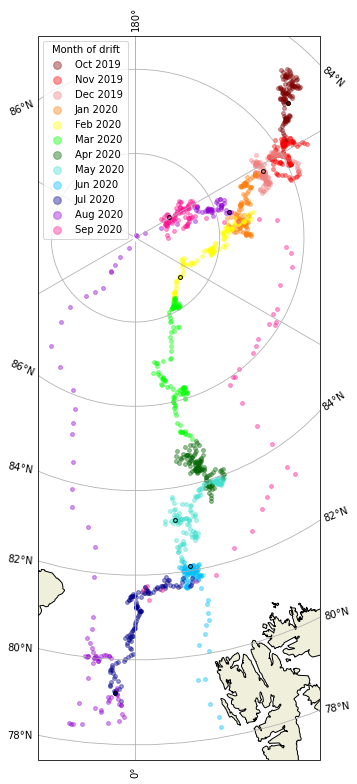

In [9]:
colors = ['maroon', 'red', 'lightcoral', 'tab:orange', 'yellow','lime','darkgreen','turquoise','deepskyblue','darkblue','darkviolet','deeppink']

fig = plt.figure(figsize=(5,11))
ax = plt.axes(projection=cartopy.crs.Stereographic(central_latitude = 90, central_longitude = 0))
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
#ax.set_extent([mosaic_lon.min(), mosaic_lon.max(), mosaic_lat.min(), mosaic_lat.max()], crs=cartopy.crs.PlateCarree())

for i in range(0, len(lat_list)) :
    plt.scatter(lon_list[str(i)], lat_list[str(i)], marker='o', color=colors[i], s=15, alpha=0.4, transform=cartopy.crs.PlateCarree())
plt.legend(['Oct 2019','Nov 2019','Dec 2019','Jan 2020','Feb 2020','Mar 2020','Apr 2020','May 2020','Jun 2020','Jul 2020','Aug 2020','Sep 2020'], title='Month of drift', markerscale=2.)

dates = ['04/10/19','13/12/19','24/02/19','16/05/20','19/06/20','31/07/20','21/08/20','20/09/20']
dates_indx = [13,290,573,886,990,1156,1238,1356] 

dates_colors=['maroon','lightcoral','yellow','turquoise','deepskyblue','darkblue','darkviolet','deeppink']
for i in range(0,len(dates_indx)) :
    plt.scatter(lon[dates_indx[i]], lat[dates_indx[i]], marker='o', s=15, edgecolors='k', color=dates_colors[i], transform=cartopy.crs.PlateCarree())
    #texts = [plt.annotate(dates[i], (lon[dates_indx[i]], lat[dates_indx[i]]), weight='bold', size='10', color='k', transform=cartopy.crs.PlateCarree())]
    #adjust_text(texts)
    
fig.tight_layout()
path_fig = '/lustre/storeB/users/justinec/master_internship/figures/'
plt.savefig(path_fig+'MOSAiC_trajectory.png',dpi=300)

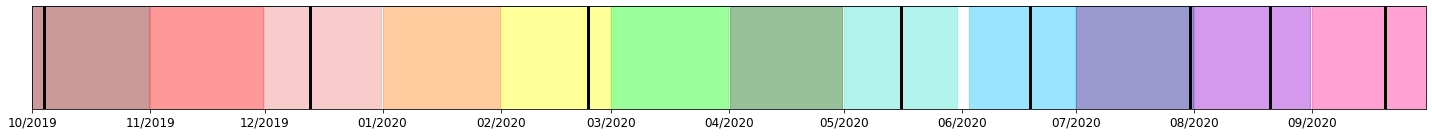

In [63]:
parameters = {'axes.labelsize':14, 'axes.titlesize':15, 'legend.fontsize':16, 'xtick.labelsize':12, 'ytick.labelsize':12, 
                  'legend.title_fontsize':14, 'figure.titlesize':25}
plt.rcParams.update(parameters)

start = datetime.datetime.strptime("01/09/2019", "%d/%m/%Y")
end = datetime.datetime.strptime("01/10/2020", "%d/%m/%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

list_leg_str = ['04/10/2019', '13/12/2019', '24/02/2020', '16/05/2020', '19/06/2020', '31/07/2020', '21/08/2020', '20/09/2020']
list_leg = [datetime.datetime.strptime(list_leg_str[i], "%d/%m/%Y") for i in range(len(list_leg_str))]

fig = plt.figure(figsize=(20,2))
ax = fig.add_subplot(111)
plt.plot(date_generated,[1]*len(date_generated))
plt.ylim(0,1)
plt.xlim(times[0], times[-1])
ax.xaxis.set_major_formatter(dates.DateFormatter('%m/%Y'))
plt.yticks([])
  
for i in range(0, len(time_list)) :
    plt.axvspan(time_list[str(i)][0],time_list[str(i)][-1],color=colors[i],alpha=0.4)
        
for i in range(0,len(list_leg)) :
    plt.axvline(list_leg[i], color='k',linewidth=3)
    
#to plot grey periods of legs
#plt.axvspan(list_leg[0],list_leg[1],color='grey')
#plt.axvspan(list_leg[1],list_leg[2],color='grey')
#plt.axvspan(list_leg[2],list_leg[3],color='darkgrey')
#plt.axvspan(list_leg[4],list_leg[5],color='grey')
#plt.axvspan(list_leg[6],list_leg[7],color='darkgrey')

fig.tight_layout()
plt.savefig(path_fig+'MOSAiC_timeline.png',dpi=300)